In [ ]:
!pip install idx2numpy
import numpy as np
import idx2numpy as id
import matplotlib.pyplot as plt


import torch
import torchvision
import torch.optim as op
import torch.nn as nn
import torch.nn.functional as f

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=a558b7a3fe8ed6a056e4f341b28a3f01d2e9d46b512e584725cf374643ac4d19
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
dataset1=id.convert_from_file("/content/drive/MyDrive/IVLabs/MNIST/train-images.idx3-ubyte")
dataset2=id.convert_from_file("/content/drive/MyDrive/IVLabs/MNIST/train-labels.idx1-ubyte")
dataset3=id.convert_from_file("/content/drive/MyDrive/IVLabs/MNIST/t10k-images.idx3-ubyte")
dataset4=id.convert_from_file("/content/drive/MyDrive/IVLabs/MNIST/t10k-labels.idx1-ubyte")
dataset4.shape
dataset3.shape
dataset3 = dataset3.reshape(10000,784)
dataset3.shape

(10000, 784)

In [ ]:
y=np.zeros((10,60000))
for i in range(60000):
  y[dataset2[i]][i]=1.0
x2=dataset1.reshape(60000,784).T
x=x2/255
X_minibatch={}
Y_minibatch={}
for i in range(234):
  X_minibatch["X"+str(i+1)]=x[:,i*256:256*(i+1)]
  Y_minibatch["Y"+str(i+1)]=y[:,i*256:256*(i+1)]

tar={}
for i in range(234):
  t=[]
  for j in range(256):
    t.append(np.argmax(Y_minibatch["Y"+str(i+1)][:,j]))
  tar["Y"+str(i+1)]=t

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


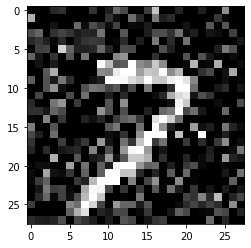

In [ ]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
noise_factor = 0.3
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
auto_dataset=torch.tensor(x_train_noisy.reshape(60000,784))
print(x_train_noisy.shape)
plt.imshow(x_train_noisy[567,:,:],cmap="gray")

In [ ]:
# class Net(nn.Module):
#   def __init__(self):
#     super(Net,self).__init__()
#     self.l1=nn.Linear(784,500)
#     self.l2=nn.Linear(500,300)
#     self.l3=nn.Linear(300,100)
#     self.l4=nn.Linear(100,30)
#     self.l5=nn.Linear(30,10)
#     self.l1d=nn.Linear(10,30)
#     self.l2d=nn.Linear(30,100)
#     self.l3d=nn.Linear(100,300)
#     self.l4d=nn.Linear(300,500)
#     self.l5d=nn.Linear(500,784)
#   def forward(self,x):
#     x= f.relu(self.l1(x))
#     x= f.relu(self.l2(x))
#     x= f.relu(self.l3(x))
    # x= f.relu(self.l4(x))
    # x= f.relu(self.l5(x))
    # x= f.relu(self.l1d(x))
    # x= f.relu(self.l2d(x))
    # x= f.relu(self.l3d(x))
    # x= f.relu(self.l4d(x))
    # x= torch.sigmoid(self.l5d(x))
    # return x

In [ ]:
class Net_CNN(nn.Module):
  def __init__(self):
    super(Net_CNN,self).__init__()
    self.l6=nn.Conv2d(1,16,3, padding=1 )
    self.l7=nn.Conv2d(16,32,3, padding=1)
    self.l8=nn.Conv2d(32,64,3, padding=1)
    self.mp = nn.MaxPool2d(2, 2) 
    self.l7d=nn.ConvTranspose2d(64,16,2, stride=2) 
    self.l8d=nn.ConvTranspose2d(16,1,2, stride=2)

   
  def forward(self,x):
    x= f.relu(self.l6(x))
    x= f.relu(self.l7(x))
    x= self.mp(f.relu(self.l8(x)))
    x= f.relu(self.l7d(x))
    x= torch.sigmoid(self.mp(self.l8d(x)))
    return x

In [ ]:
auto_encoder=Net_CNN().to(device)
loss_func=torch.nn.MSELoss()
opt=torch.optim.SGD(auto_encoder.parameters(), lr = 0.01, momentum=0.9)

In [ ]:
X_batch={}
Y_batch={}
for a in range(234):
  X_batch["X"+str(a+1)]=  auto_dataset[a*256:256*(a+1),:].reshape(256,1,28,28)
  Y_batch["Y"+str(a+1)]=  X_train[a*256:256*(a+1),:,:]
  Y_batch["Y"+str(a+1)]= Y_batch["Y"+str(a+1)].reshape(256,1,28,28)
for i in range(20):
  for j in range(1,235):
    data,target=X_batch["X"+str(j)].to(device),torch.tensor(Y_batch["Y"+str(j)]).to(device)
    opt.zero_grad()
    out=auto_encoder(data.float())
  
    cost=loss_func(out,target.float())
    cost.backward()
    opt.step()
    if j%200==0:
      print(i," ",cost.item())

0   0.0060386634431779385
1   0.0060332766734063625
2   0.006027934607118368
3   0.006022608373314142
4   0.006017323583364487
5   0.006012067198753357
6   0.006006849929690361
7   0.006001743488013744
8   0.005996668245643377
9   0.00599163630977273
10   0.005986637901514769
11   0.0059817079454660416
12   0.005976846441626549
13   0.005972037557512522
14   0.0059672570787370205
15   0.005962539464235306
16   0.005957864690572023
17   0.005953214596956968
18   0.005948616191744804
19   0.005944040138274431


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or source

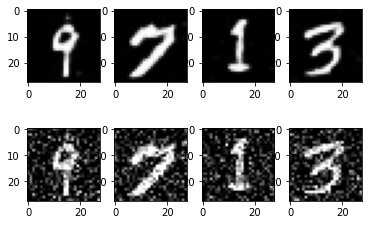

In [ ]:
i=919
plt.figure()
x=auto_dataset[i:i+1,:].reshape(1,1,28,28)
res=auto_encoder(torch.tensor(x).float().to(device))
plt.subplot(241)
a=(res).to('cpu').detach().numpy().reshape(28,28)
plt.imshow(a, Cmap="gray")
plt.subplot(245)
plt.imshow(auto_dataset[i:i+1,:].reshape(28,28), Cmap="gray")


i+=1
x=auto_dataset[i:i+1,:].reshape(1,1,28,28)
res=auto_encoder(torch.tensor(x).float().to(device))
plt.subplot(242)
a=(res).to('cpu').detach().numpy().reshape(28,28)
plt.imshow(a, Cmap="gray")
plt.subplot(246)
plt.imshow(auto_dataset[i:i+1,:].reshape(28,28), Cmap="gray")


i+=1
x=auto_dataset[i:i+1,:].reshape(1,1,28,28)
res=auto_encoder(torch.tensor(x).float().to(device))
plt.subplot(243)
a=(res).to('cpu').detach().numpy().reshape(28,28)
plt.imshow(a, Cmap="gray")
plt.subplot(247)
plt.imshow(auto_dataset[i:i+1,:].reshape(28,28), Cmap="gray")


i+=1
x=auto_dataset[i:i+1,:].reshape(1,1,28,28)
res=auto_encoder(torch.tensor(x).float().to(device))
plt.subplot(244)
a=(res).to('cpu').detach().numpy().reshape(28,28)
plt.imshow(a, Cmap="gray")
plt.subplot(248)
plt.imshow(auto_dataset[i:i+1,:].reshape(28,28), Cmap="gray")